In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("7.csv")

# View the first few rows
print(df.head())

# Summary info
print(df.info())

# Check for missing values
print(df.isnull().sum())


              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


In [2]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder object
le = LabelEncoder()

# Encode species column
df["species_encoded"] = le.fit_transform(df["species"])

# To check the unique encoded labels
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Anabas testudineus': 0, 'Coilia dussumieri': 1, 'Otolithoides biauritus': 2, 'Otolithoides pama': 3, 'Pethia conchonius': 4, 'Polynemus paradiseus': 5, 'Puntius lateristriga': 6, 'Setipinna taty': 7, 'Sillaginopsis panijus': 8}


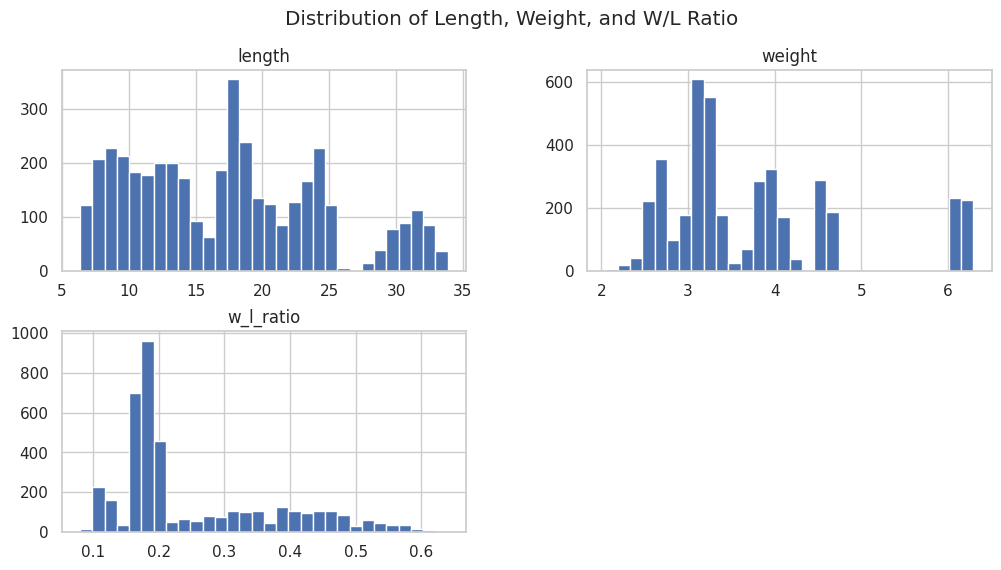

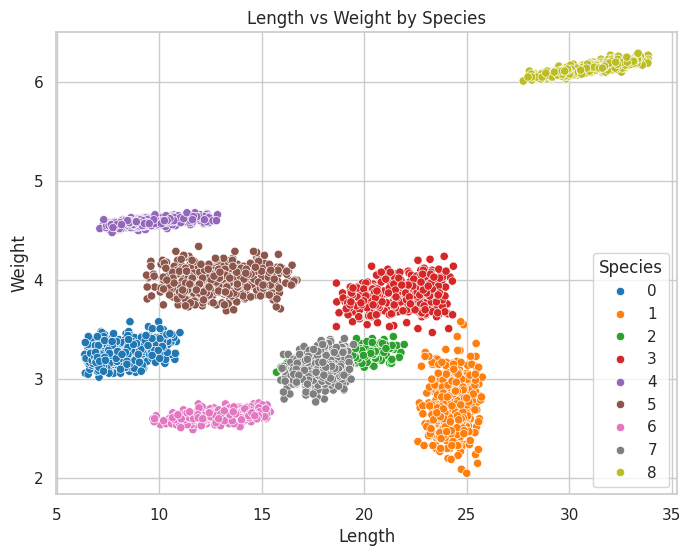

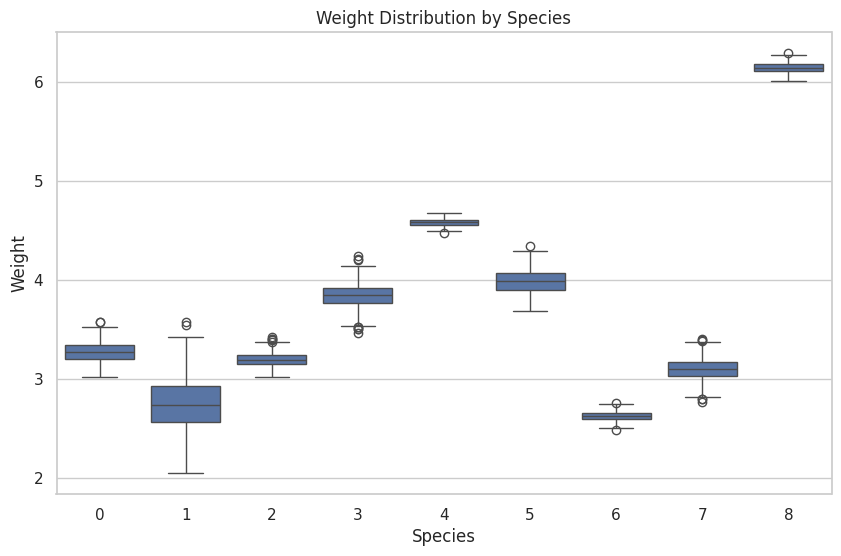

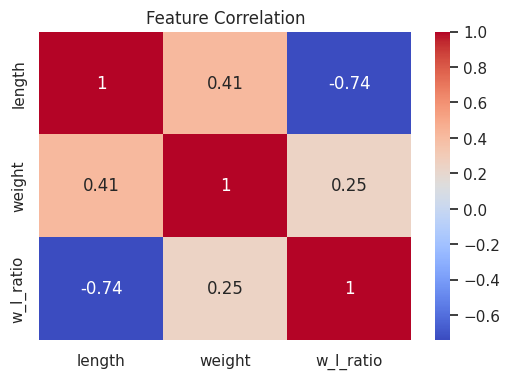

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram of Length, Weight, and W/L ratio
df[["length", "weight", "w_l_ratio"]].hist(bins=30, figsize=(12, 6))
plt.suptitle("Distribution of Length, Weight, and W/L Ratio")
plt.show()

# Scatter plot: Length vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="length", y="weight", hue="species_encoded", palette="tab10")
plt.title("Length vs Weight by Species")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend(title="Species")
plt.show()

# Boxplot for Weight by Species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species_encoded", y="weight", data=df)
plt.title("Weight Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Weight")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[["length", "weight", "w_l_ratio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [4]:


scaler = MinMaxScaler()
df[['length', 'weight', 'w_l_ratio']] = scaler.fit_transform(data[['length', 'weight', 'w_l_ratio']])


NameError: name 'MinMaxScaler' is not defined

In [5]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[["length", "weight", "w_l_ratio"]]
y = df["species_encoded"]

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Check the shape
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)



Train size: (2448, 3)
Test size: (1632, 3)


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("7.csv")
X = df.drop("species", axis=1)
y = df["species"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42, stratify=y_train_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9485294117647058
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.78      0.77      0.77        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.78      0.79      0.78        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.95       408
             macro avg       0.95      0.95      0.95       408
          weighted avg       0.95      0.95      0.95       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0 11  0]
 [ 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9485294117647058
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.78      0.77      0.77        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.78      0.79      0.78        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.95       408
             macro avg       0.95      0.95      0.95       408
          weighted avg       0.95      0.95      0.95       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0 11  0]
 [ 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can try different k values too
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.9485294117647058
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.78      0.77      0.77        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.78      0.79      0.78        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.95       408
             macro avg       0.95      0.95      0.95       408
          weighted avg       0.95      0.95      0.95       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0 11  0]

In [12]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC()  # You can add kernel='linear' or 'rbf' to experiment
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.8700980392156863
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      0.98      0.99        48
     Coilia dussumieri       1.00      0.98      0.99        41
Otolithoides biauritus       0.59      0.43      0.49        47
     Otolithoides pama       0.93      0.88      0.90        43
     Pethia conchonius       0.93      0.90      0.91        48
  Polynemus paradiseus       0.87      0.89      0.88        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.59      0.81      0.68        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.87       408
             macro avg       0.88      0.87      0.87       408
          weighted avg       0.87      0.87      0.87       408

Confusion Matrix:
 [[47  0  0  0  0  1  0  0  0]
 [ 0 40  0  1  0  0  0  0  0]
 [ 0  0 20  2  0  0  0 25  0]

In [13]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9313725490196079
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.74      0.62      0.67        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.68      0.79      0.73        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.93       408
             macro avg       0.94      0.93      0.93       408
          weighted avg       0.93      0.93      0.93       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 29  0

/home/munny_1129/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9411764705882353
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.79      0.66      0.72        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.71      0.83      0.77        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.94       408
             macro avg       0.95      0.94      0.94       408
          weighted avg       0.94      0.94      0.94       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0

In [15]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9411764705882353
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.79      0.66      0.72        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.71      0.83      0.77        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.94       408
             macro avg       0.95      0.94      0.94       408
          weighted avg       0.94      0.94      0.94       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  

In [16]:
from sklearn.neural_network import MLPClassifier

# Neural Network Model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate
print("Neural Network (MLP) Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Neural Network (MLP) Accuracy: 0.946078431372549
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        48
     Coilia dussumieri       1.00      1.00      1.00        41
Otolithoides biauritus       0.70      0.91      0.80        47
     Otolithoides pama       1.00      1.00      1.00        43
     Pethia conchonius       1.00      1.00      1.00        48
  Polynemus paradiseus       1.00      1.00      1.00        46
  Puntius lateristriga       1.00      1.00      1.00        42
        Setipinna taty       0.88      0.62      0.73        48
 Sillaginopsis panijus       1.00      1.00      1.00        45

              accuracy                           0.95       408
             macro avg       0.95      0.95      0.95       408
          weighted avg       0.95      0.95      0.94       408

Confusion Matrix:
 [[48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0]
 [ 0  0 43  0

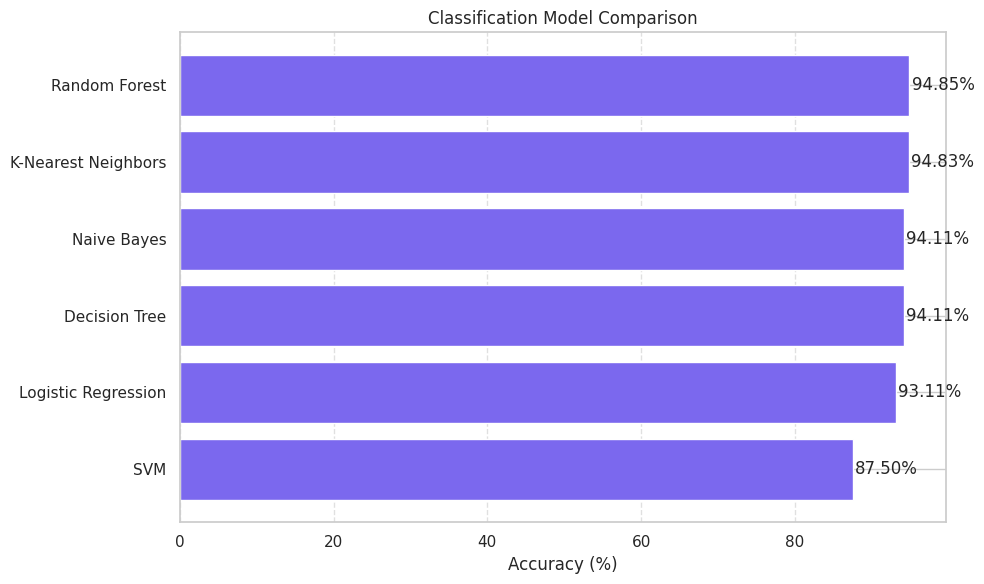

In [21]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = [
    "Random Forest", 
    "K-Nearest Neighbors", 
    "Naive Bayes", 
    "Decision Tree", 
    "Logistic Regression", 
    "SVM"
]
accuracies = [94.85, 94.83, 94.11, 94.11, 93.11, 87.50]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color='mediumslateblue')
plt.xlabel('Accuracy (%)')
plt.title('Classification Model Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Best at the top

# Adding accuracy labels on the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, f"{acc:.2f}%", va='center')

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Load your dataset
data = pd.read_csv("7.csv")

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Now calculate correlation
print(numeric_data.corr())


             length    weight  w_l_ratio
length     1.000000  0.411584  -0.738174
weight     0.411584  1.000000   0.245835
w_l_ratio -0.738174  0.245835   1.000000


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target for regression
X_reg = data[['length', 'w_l_ratio']]
y_reg = data['weight']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)

# Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predict
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression RMSE:", rmse)
print("R² Score:", r2)


Regression RMSE: 0.4271755008713167
R² Score: 0.8232227527713947


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_poly = df[['length', 'w_l_ratio']]
y_poly = df['weight']


# Split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.4, random_state=42)

# Polynomial regression pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("Polynomial Regression RMSE:", rmse_poly)
print("R² Score:", r2_poly)


Polynomial Regression RMSE: 0.05454139236722943
R² Score: 0.9971181847612728


In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare data
X_nn = df[['length', 'w_l_ratio']]
y_nn = df['weight']

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.4, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train_nn)

# Predict
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluation
rmse_nn = np.sqrt(mean_squared_error(y_test_nn, y_pred_nn))
r2_nn = r2_score(y_test_nn, y_pred_nn)

print("Neural Network Regression RMSE:", rmse_nn)
print("R² Score:", r2_nn)


Neural Network Regression RMSE: 0.06664057682246768
R² Score: 0.9956419667175495


##Clustering Analysis
We'll now apply clustering algorithms to understand the natural groupings in the dataset. We'll use both **K-Means** and **K-Medoids** for comparison.

/home/munny_1129/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.4947


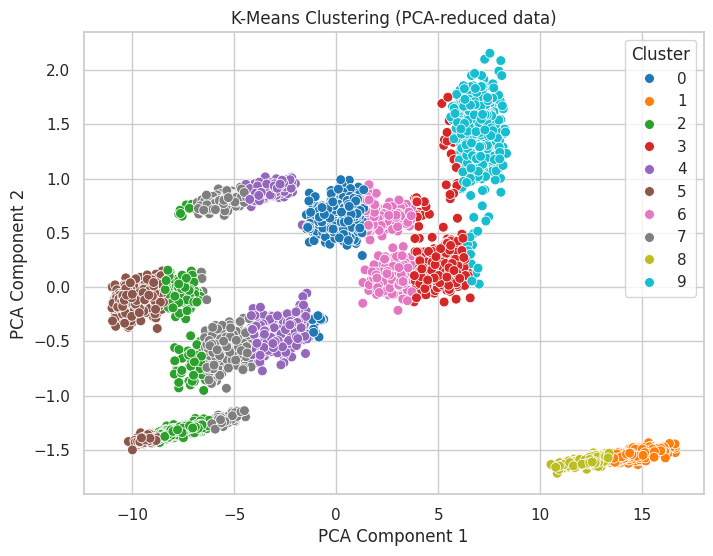

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Silhouette Score
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=kmeans_labels, palette="tab10", s=50)
plt.title("K-Means Clustering (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


K-Medoids Silhouette Score: 0.4957


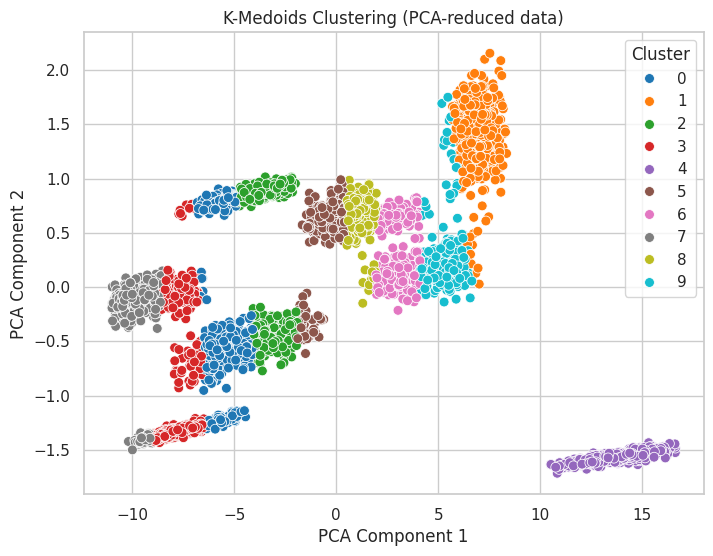

In [27]:
# Optional: K-Medoids clustering if sklearn_extra is installed
try:
    from sklearn_extra.cluster import KMedoids

    kmedoids = KMedoids(n_clusters=10, random_state=42, method='pam')
    kmedoids_labels = kmedoids.fit_predict(X)
    kmedoids_silhouette = silhouette_score(X, kmedoids_labels)
    print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.4f}")

    # Visualization
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=kmedoids_labels, palette="tab10", s=50)
    plt.title("K-Medoids Clustering (PCA-reduced data)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

except ImportError:
    print("K-Medoids requires 'scikit-learn-extra'. Install it using `pip install scikit-learn-extra` to enable this cell.")


# Observations
- The **Silhouette Score** gives an idea of how well-separated the clusters are.
- A higher silhouette score indicates better-defined clusters.
- Visual inspection of PCA-reduced plots can help verify if clusters are clearly distinguishable.
- Consider testing different values of `k` to find the optimal number of clusters.

## Cluster Decision Boundaries

/home/munny_1129/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


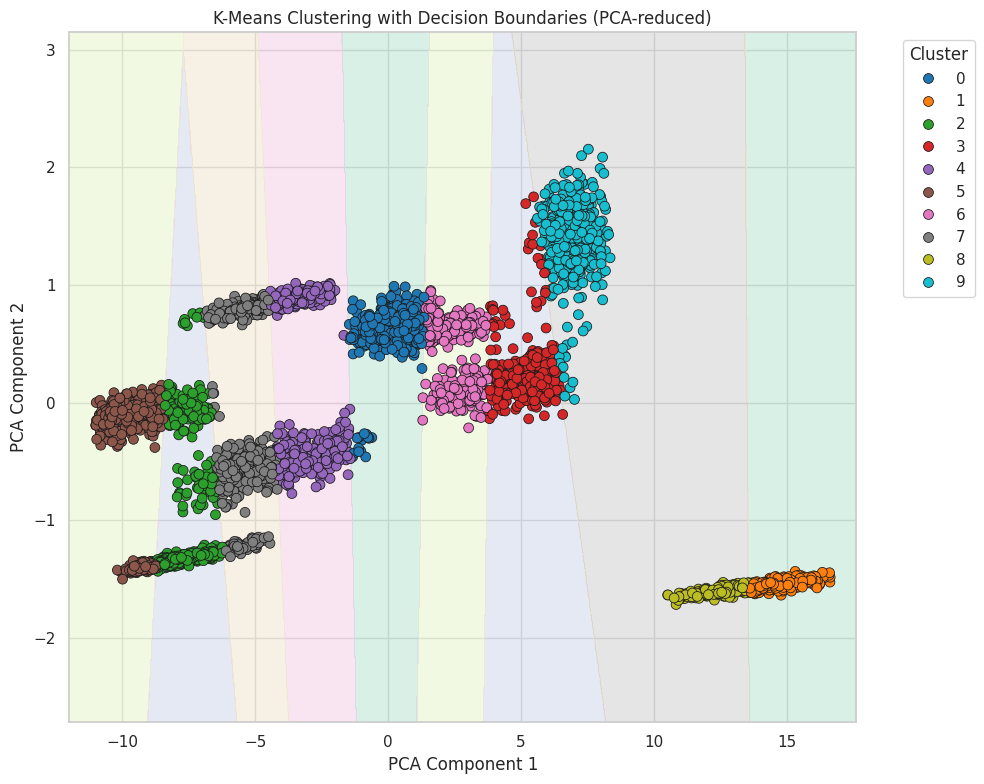

In [29]:
# Train a new KMeans on the PCA-reduced data for visualization only
kmeans_vis = KMeans(n_clusters=10, random_state=42)
kmeans_vis.fit(X_reduced)

# Meshgrid over PCA space
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the 2D PCA space
Z = kmeans_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.5)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=kmeans_vis.labels_,
                palette="tab10", s=50, edgecolor='k')
plt.title("K-Means Clustering with Decision Boundaries (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
np.sum(kmeans_vis.labels_ == 8)



175

In [33]:
c8 = kmeans_vis.cluster_centers_[8]
c9 = kmeans_vis.cluster_centers_[9]
distance = np.linalg.norm(c8 - c9)
print(f"Distance between cluster 8 and 9 in PCA space: {distance:.4f}")


Distance between cluster 8 and 9 in PCA space: 6.1995


In [34]:
print("Cluster 8:", np.sum(kmeans_vis.labels_ == 8))
print("Cluster 9:", np.sum(kmeans_vis.labels_ == 9))


Cluster 8: 175
Cluster 9: 413


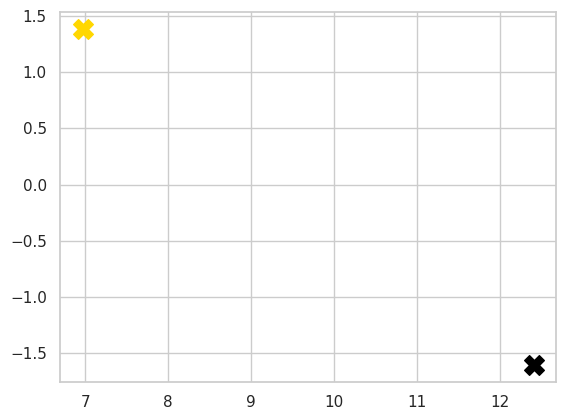

In [37]:
plt.scatter(c8[0], c8[1], marker='X', color='black', s=200, label='Centroid 8')
plt.scatter(c9[0], c9[1], marker='X', color='gold', s=200, label='Centroid 9')



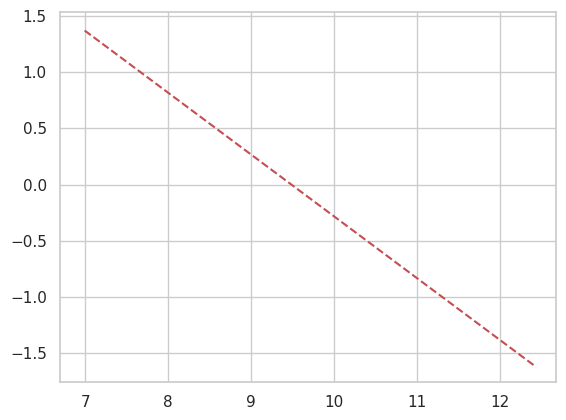

In [38]:
plt.plot([c8[0], c9[0]], [c8[1], c9[1]], 'r--', label='Centroid Connection')



 ##Why are clusters 8 and 9 sharing the same boundary?

 
Because in PCA-reduced 2D space, the centroids of clusters 8 and 9 are closest to each other, so the decision boundary (Voronoi boundary) between them lies directly in the middle

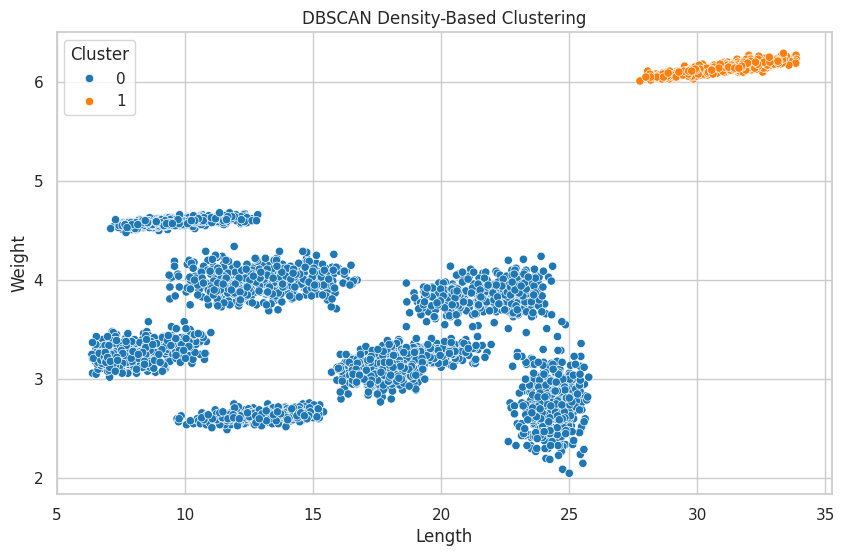

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppose df has 'Length' and 'Weight' columns
X = df[['Length', 'Weight']].values
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels = db.labels_

# Add cluster labels to dataframe
df['Cluster'] = labels

# Plot DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Length', y='Weight', hue='Cluster', palette='tab10')
plt.title("DBSCAN Density-Based Clustering")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend(title="Cluster")
plt.show()


In [68]:
print(df['cluster'].value_counts())

cluster
0    3625
1     455
Name: count, dtype: int64


In [69]:
db = DBSCAN(eps=0.3, min_samples=10)

In [70]:
print(df.columns)



Index(['Species', 'Length', 'Weight', 'W_L_Ratio', 'Cluster', 'cluster'], dtype='object')


In [71]:
df.columns = df.columns.str.strip().str.title().str.replace(" ", "")

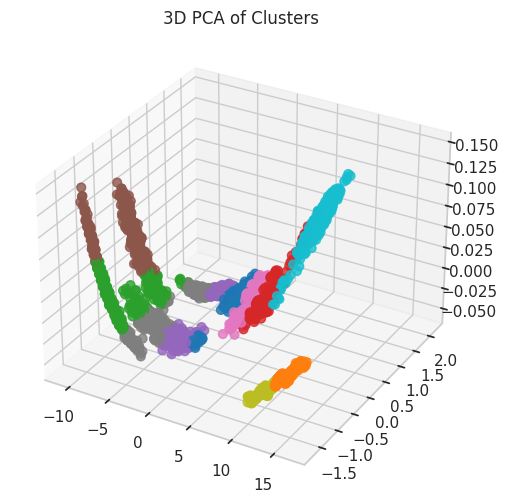

In [36]:
from mpl_toolkits.mplot3d import Axes3D

X_reduced_3d = PCA(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2],
                     c=kmeans.labels_, cmap='tab10', s=40, alpha=0.8)
plt.title("3D PCA of Clusters")
plt.show()


<Figure size 1000x600 with 0 Axes>

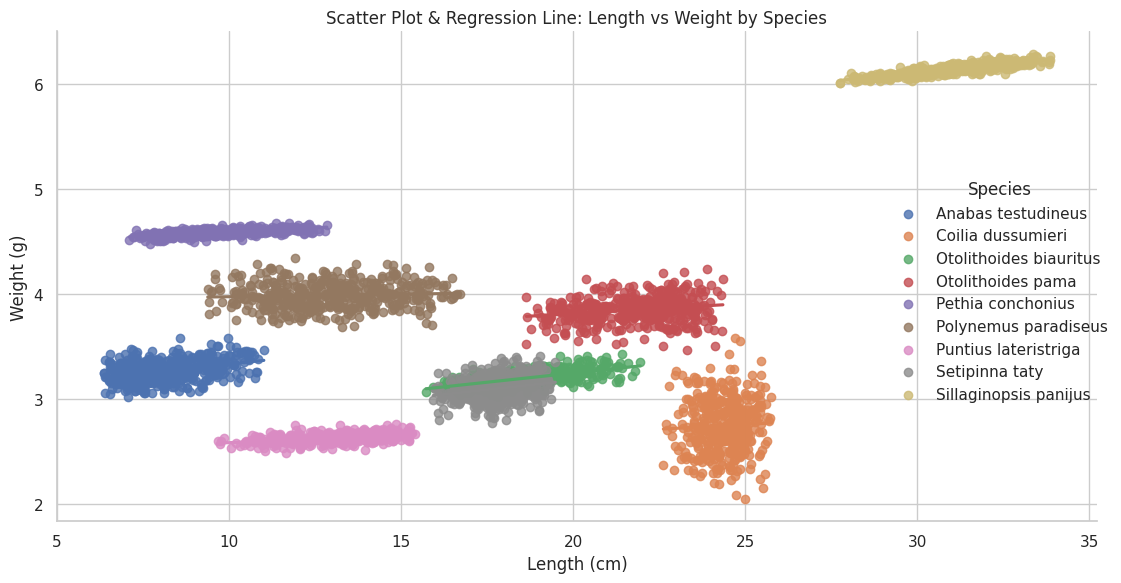

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line per species
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Length', y='Weight', hue='Species', height=6, aspect=1.5, ci=None)
plt.title("Scatter Plot & Regression Line: Length vs Weight by Species")
plt.xlabel("Length (cm)")
plt.ylabel("Weight (g)")
plt.tight_layout()
plt.show()


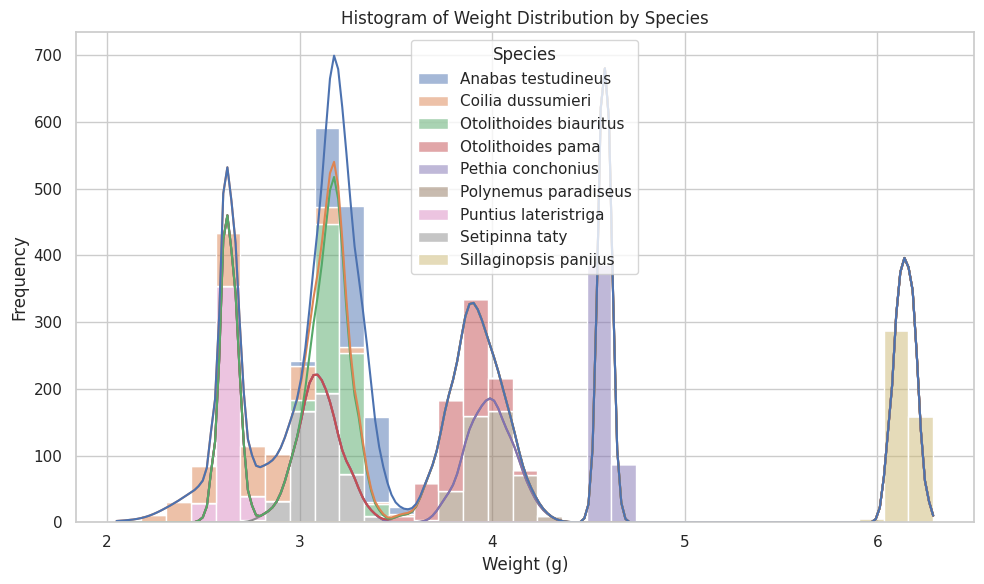

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight', hue='Species', multiple='stack', kde=True)
plt.title("Histogram of Weight Distribution by Species")
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<Axes: xlabel='Weight', ylabel='Density'>

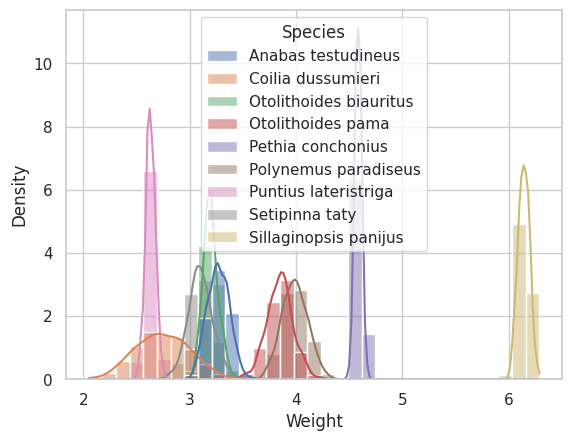

In [50]:

sns.histplot(data=df, x="Weight", hue="Species", kde=True, stat="density", common_norm=False)
